In [1]:
import pandas as pd
import regex as re

In [2]:
output_file = "data/obermeyer/obermeyer_data_cleaned.csv"
all_columns = ["risk_score_t", "program_enrolled_t", "cost_t", "cost_avoidable_t", "bps_mean_t", "ghba1c_mean_t", "hct_mean_t",
               "cre_mean_t", "ldl_mean_t", "race", "dem_female", "dem_age_band_18-24_tm1", "dem_age_band_25-34_tm1",
               "dem_age_band_35-44_tm1", "dem_age_band_45-54_tm1", "dem_age_band_55-64_tm1", "dem_age_band_65-74_tm1",
               "dem_age_band_75+_tm1", "alcohol_elixhauser_tm1", "anemia_elixhauser_tm1", "arrhythmia_elixhauser_tm1",
               "arthritis_elixhauser_tm1", "bloodlossanemia_elixhauser_tm1", "coagulopathy_elixhauser_tm1", "compdiabetes_elixhauser_tm1",
               "depression_elixhauser_tm1", "drugabuse_elixhauser_tm1", "electrolytes_elixhauser_tm1", "hypertension_elixhauser_tm1",
               "hypothyroid_elixhauser_tm1", "liver_elixhauser_tm1", "neurodegen_elixhauser_tm1", "obesity_elixhauser_tm1",
               "paralysis_elixhauser_tm1", "psychosis_elixhauser_tm1", "pulmcirc_elixhauser_tm1", "pvd_elixhauser_tm1",
               "renal_elixhauser_tm1", "uncompdiabetes_elixhauser_tm1", "valvulardz_elixhauser_tm1", "wtloss_elixhauser_tm1",
               "cerebrovasculardz_romano_tm1", "chf_romano_tm1", "dementia_romano_tm1", "hemiplegia_romano_tm1", "hivaids_romano_tm1",
               "metastatic_romano_tm1", "myocardialinfarct_romano_tm1", "pulmonarydz_romano_tm1", "tumor_romano_tm1", "ulcer_romano_tm1",
               "cost_dialysis_tm1", "cost_emergency_tm1", "cost_home_health_tm1", "cost_ip_medical_tm1", "cost_ip_surgical_tm1",
               "cost_laboratory_tm1", "cost_op_primary_care_tm1", "cost_op_specialists_tm1", "cost_op_surgery_tm1", "cost_other_tm1",
               "cost_pharmacy_tm1", "cost_physical_therapy_tm1", "cost_radiology_tm1", "lasix_dose_count_tm1", "lasix_min_daily_dose_tm1",
               "lasix_mean_daily_dose_tm1", "lasix_max_daily_dose_tm1", "cre_tests_tm1", "crp_tests_tm1", "esr_tests_tm1", "ghba1c_tests_tm1",
               "hct_tests_tm1", "ldl_tests_tm1", "nt_bnp_tests_tm1", "sodium_tests_tm1", "trig_tests_tm1", "cre_min-low_tm1", "cre_min-high_tm1",
               "cre_min-normal_tm1", "cre_mean-low_tm1", "cre_mean-high_tm1", "cre_mean-normal_tm1", "cre_max-low_tm1", "cre_max-high_tm1",
               "cre_max-normal_tm1", "crp_min-low_tm1", "crp_min-high_tm1", "crp_min-normal_tm1", "crp_mean-low_tm1", "crp_mean-high_tm1",
               "crp_mean-normal_tm1", "crp_max-low_tm1", "crp_max-high_tm1", "crp_max-normal_tm1", "esr_min-low_tm1", "esr_min-high_tm1",
               "esr_min-normal_tm1", "esr_mean-low_tm1", "esr_mean-high_tm1", "esr_mean-normal_tm1", "esr_max-low_tm1", "esr_max-high_tm1",
               "esr_max-normal_tm1", "ghba1c_min-low_tm1", "ghba1c_min-high_tm1", "ghba1c_min-normal_tm1", "ghba1c_mean-low_tm1",
               "ghba1c_mean-high_tm1", "ghba1c_mean-normal_tm1", "ghba1c_max-low_tm1", "ghba1c_max-high_tm1", "ghba1c_max-normal_tm1",
               "hct_min-low_tm1", "hct_min-high_tm1", "hct_min-normal_tm1", "hct_mean-low_tm1", "hct_mean-high_tm1", "hct_mean-normal_tm1",
               "hct_max-low_tm1", "hct_max-high_tm1", "hct_max-normal_tm1", "ldl_min-low_tm1", "ldl_min-high_tm1", "ldl_min-normal_tm1",
               "ldl-mean-low_tm1", "ldl-mean-high_tm1", "ldl-mean-normal_tm1", "ldl_max-low_tm1", "ldl_max-high_tm1", "ldl_max-normal_tm1",
               "nt_bnp_min-low_tm1", "nt_bnp_min-high_tm1", "nt_bnp_min-normal_tm1", "nt_bnp_mean-low_tm1", "nt_bnp_mean-high_tm1",
               "nt_bnp_mean-normal_tm1", "nt_bnp_max-low_tm1", "nt_bnp_max-high_tm1", "nt_bnp_max-normal_tm1", "sodium_min-low_tm1",
               "sodium_min-high_tm1", "sodium_min-normal_tm1", "sodium_mean-low_tm1", "sodium_mean-high_tm1", "sodium_mean-normal_tm1",
               "sodium_max-low_tm1", "sodium_max-high_tm1", "sodium_max-normal_tm1", "trig_min-low_tm1", "trig_min-high_tm1",
               "trig_min-normal_tm1", "trig_mean-low_tm1", "trig_mean-high_tm1", "trig_mean-normal_tm1", "trig_max-low_tm1",
               "trig_max-high_tm1", "trig_max-normal_tm1", "gagne_sum_tm1", "gagne_sum_t"]
pattern = re.compile("(gagne_sum_tm1|hypertension_elixhauser_tm1|^dem_|cost.*tm1)|cost_t|race|gagne_sum_t") # cost_t, race, gagne_sum_t need to be dropped while training
column_names = [column_name for column_name in all_columns if re.match(pattern, column_name)]
print(column_names)
df = pd.read_csv("data/obermeyer/obermeyer_data_v1.csv", usecols=column_names)
df.columns = column_names

['cost_t', 'race', 'dem_female', 'dem_age_band_18-24_tm1', 'dem_age_band_25-34_tm1', 'dem_age_band_35-44_tm1', 'dem_age_band_45-54_tm1', 'dem_age_band_55-64_tm1', 'dem_age_band_65-74_tm1', 'dem_age_band_75+_tm1', 'hypertension_elixhauser_tm1', 'cost_dialysis_tm1', 'cost_emergency_tm1', 'cost_home_health_tm1', 'cost_ip_medical_tm1', 'cost_ip_surgical_tm1', 'cost_laboratory_tm1', 'cost_op_primary_care_tm1', 'cost_op_specialists_tm1', 'cost_op_surgery_tm1', 'cost_other_tm1', 'cost_pharmacy_tm1', 'cost_physical_therapy_tm1', 'cost_radiology_tm1', 'gagne_sum_tm1', 'gagne_sum_t']


In [3]:
qualified_cost_75, qualified_cost_50, qualified_cost_25 = df["cost_t"].dropna().quantile([0.25, 0.50, 0.75])
print(qualified_cost_75, qualified_cost_50, qualified_cost_25)

df['qualified_cost_75'] = df['cost_t'].apply(lambda x: 1 if x >= qualified_cost_75 else 0)
df['qualified_cost_50'] = df['cost_t'].apply(lambda x: 1 if x >= qualified_cost_50 else 0)
df['qualified_cost_25'] = df['cost_t'].apply(lambda x: 1 if x >= qualified_cost_25 else 0)

1200.0 2800.0 6600.0


In [4]:
len(df[df["gagne_sum_t"]>=1])/len(df), len(df[df["gagne_sum_t"]>=2])/len(df), len(df[df["gagne_sum_t"]>=3])/len(df)

(0.5447072810757625, 0.3161692358150213, 0.18764348966874386)

In [5]:
df['qualified_gagne_3'] = df['gagne_sum_t'].apply(lambda x: 1 if x >= 3 else 0)
df['qualified_gagne_2'] = df['gagne_sum_t'].apply(lambda x: 1 if x >= 2 else 0)
df['qualified_gagne_1'] = df['gagne_sum_t'].apply(lambda x: 1 if x >= 1 else 0)

In [6]:
df.loc[:, 'race'] = df['race'].apply(lambda x: 1 if x=="black" else 0)
for column_name in column_names:
    if column_name == "gagne_sum_t":
        continue
    if (df[column_name].max() == df[column_name].min()):
        print(column_name, df[column_name].max())
    else:
        df[column_name] = (df[column_name]-df[column_name].min()) / (df[column_name].max() - df[column_name].min())
df['person_id'] = df.index

In [7]:
df.head()

,cost_t,race,dem_female,dem_age_band_18-24_tm1,dem_age_band_25-34_tm1,dem_age_band_35-44_tm1,dem_age_band_45-54_tm1,dem_age_band_55-64_tm1,dem_age_band_65-74_tm1,dem_age_band_75+_tm1,...,cost_radiology_tm1,gagne_sum_tm1,gagne_sum_t,qualified_cost_75,qualified_cost_50,qualified_cost_25,qualified_gagne_3,qualified_gagne_2,qualified_gagne_1,person_id
0,0.002180,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0,1,0,0,0,0,0,0
1,0.004723,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.014486,0.222222,3,1,0,0,1,1,1,1
2,0.000908,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,0,0,0,0,2
3,0.002361,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,1,0,0,0,0,0,3
4,0.001998,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.055556,1,0,0,0,0,0,1,4


In [8]:
#df.to_csv(output_file, index=False)

In [9]:
features = ['dem_female', 'dem_age_band_18-24_tm1', 'dem_age_band_25-34_tm1', 'dem_age_band_35-44_tm1', 'dem_age_band_45-54_tm1',
            'dem_age_band_55-64_tm1', 'dem_age_band_65-74_tm1', 'dem_age_band_75+_tm1', 'hypertension_elixhauser_tm1', 'cost_dialysis_tm1',
            'cost_emergency_tm1', 'cost_home_health_tm1', 'cost_ip_medical_tm1', 'cost_ip_surgical_tm1', 'cost_laboratory_tm1',
            'cost_op_primary_care_tm1', 'cost_op_specialists_tm1', 'cost_op_surgery_tm1', 'cost_other_tm1', 'cost_pharmacy_tm1',
            'cost_physical_therapy_tm1', 'cost_radiology_tm1', 'gagne_sum_tm1']

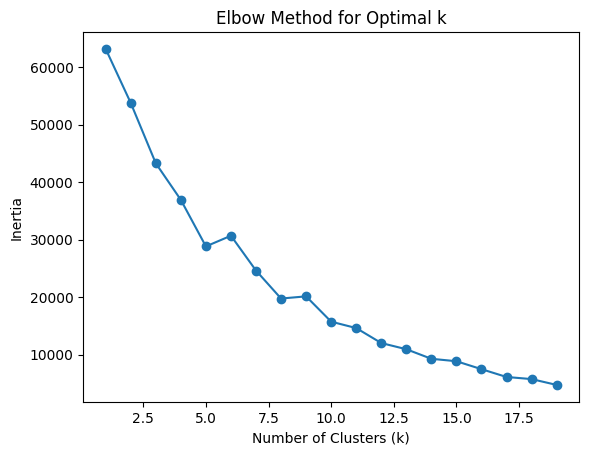

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X = df[features].to_numpy()

# Calculate inertia (WCSS) for different values of k
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 20), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [11]:
kmeans = KMeans(n_clusters=4)
df["kmeans_4"] = kmeans.fit_predict(X)

kmeans = KMeans(n_clusters=10)
df["kmeans_10"] = kmeans.fit_predict(X)

In [12]:
age_cols = ["dem_age_band_18-24_tm1", 
            "dem_age_band_25-34_tm1",
            "dem_age_band_35-44_tm1",
            "dem_age_band_45-54_tm1", 
            "dem_age_band_55-64_tm1", 
            "dem_age_band_65-74_tm1",
            "dem_age_band_75+_tm1"]
df["age"] = 0
for i,a in enumerate(age_cols):
    df.loc[df[a]==1, "age"] = i

In [13]:
df.to_csv(output_file, index=False)